<h1>Universidade Federal de Lavras </h1>
<h3>Trabalho Prático - GCC218</h3>
<h2>1 de dezembro de 2019 / Semestre 02</h2>

<p>Alunos:</p>
<p>Fábio Tavares</p>
<p>James Yuri </p>
<p>João Vitor S. Rezende</p>
 
<h1>Introdução</h1> 
<p>O planejamento de horários em instituições de ensino constitui um desafio para diretores e coordenadores pedagógicos. De fato, trata-se de uma tarefa passível a erros, devido ao seu caráter combinatório, e que exige demasiado tempo de elaboração. O problema consiste em designar horários a turmas já pré-estabelecidas. Neste trabalho a técnica de solução fundamenta-se na Teoria dos Grafos, mais precisamente no método de Coloração de vértice realizado por meio do algoritmo DSATUR e um algoritmo de melhoramento de coloração conhecido como busca local, como foi apresentado pelo prof. Mayron César, ou b-estratégia, como é nomeado no artigo <i>"Proposta e Avaliação de Novas Heurísticas Para o Problema de Coloração de Vértices"</i> com uma adaptação para que as trocas de cores sejam feitas apenas para aquelas que fazem parte das desejadas.</p> 
<p>O problema apresentado caracteriza-se como Timetabling Problem (Problema de Horários) que, quando aplicado ao contexto educacional, consiste em agendar uma série de encontros entre alunos, professores e instituições de ensino como, por exemplo, aulas, exames, cursos, entre outras atividades inerentes a este contexto, satisfazendo a um conjunto de restrições (WERRA, 1985; SCHAERF, 1999).</p>
<p>O problema apresentado faz parte da classe de problemas NP-Difícil, com isso não se consegue garantir que o problema seja resolvido em tempo polinomial.</p>

<h1>Modelagem</h1>
<p> Para a modelagem do grafo realizou-se as seguintes etapas: os vértices foram representados pelo conjunto de informações das aulas, que são os professores, a matéria e a turma. Caso a quantidade de aulas seja maior que um, teremos mais de um vértice contendo as mesmas informações (exceto o identificador).<p>
<p>Já as arestas ligam vértices que contenham a mesma turma ou mesmo professor, pois como as cores representam os horários da escola, inibirá que vértices com as mesmas informações de professores ou turma estejam em um mesmo horário.<p>
<p>Para atender as restrições de turmas e professores foram adicionadas listas (uma para turmas e outra para professores), como atributos do vértice, contendo as cores que o mesmo não poderá ter. Desta forma, evita-se que o professor fique alocado em um horário no qual não possa comparecer ou que não seja adequado para a turma.<p>

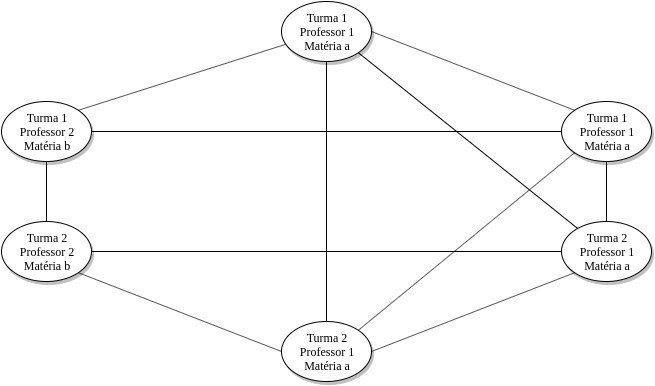

<h1> Método de solução</h1>
<p>Um grafo é um par G = (V ,E), onde V é um conjunto finito e E um conjunto de subconjuntos de dois elementos de V. Os elementos de V são chamados vértices do grafo e os elementos de E são chamados de arestas do grafo. O método utilizado para solucionar o problema fundamenta-se na Teoria dos Grafos, mais precisamente na Coloração de vértices também conhecida como Coloração de Grafos.</p>

<h2>Lista de horários</h2>

<p>Considerando as especificidades de cada escola, as informações dos horários de aulas são importadas de uma planilha chamada "Configuracoes". Depois desta importação, cria-se uma lista, chamada <i>schedules</i>, com os dias da semana concatenados com os horários importados da escola, no formato (Dia da semana) - (Hora da aula).</p>

<p>Para realizar a importação do arquivo de planilhas eletrônicas utiliza-se a biblioteca <i>openpyxl</i>, disponibilizada pelo <i>pip</i>.</p>

In [ ]:
import openpyxl

# Abrindo o arquivo de planilhas eletrônicas
path = "../public/files/Escola_A.xlsx"
wbObj = openpyxl.load_workbook(path)

# Vinculando cada planilha a uma variável
schoolData = wbObj['Dados']
settings = wbObj['Configuracoes']
classRestriction = wbObj['Restricoes Turma']
teacherRestriction = wbObj['Restricao']

# Lista com os dias da semana que terá aulas
days_week = ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"]
schedules = []

# Gerando lista de horários (schedules), concatenando os dados da lista
# de dias da semana com os horários da escola
for day in days_week:
    for i, row in enumerate(settings.rows):
        if(i > 0):
            schedules.append("{} - {}".format(day, row[0].value))

<h2>Tratamento de restrições</h2>

<p>Para tratar das restrições, primeiro geram-se duas listas: uma com todas as turmas e outra com todos os professores da escola, utilizando a planilha de dados (schoolData).</p>

In [ ]:
# instanciando a lista de restrição de cada turma e de cada professor
classes = []
teachers = []
#Colocando os professores e as turmas em uma lista
for i, row in enumerate(schoolData.rows):
    if(i > 0):
        if (not row[0].value in classes):
            classes.append(row[0].value)

        if (not row[2].value in classes):
            teachers.append(row[2].value)

<p>Em seguida, cria-se um dicionário contendo várias listas com uma chave para cada uma delas. A chave para cada lista é o nome da turma e a lista tem como seu conteúdo os índices dos horários que o vértice não poderá receber. Para o professor é aplicado o mesmo raciocínio, apenas alterando a chave do dicionário para receber o seu nome.</p>

In [ ]:
# Adicionando as restrições da turma e dos professores do arquivo em dicionários
allClassRestriction = {}
for c in classes:
    allClassRestriction[c] = []

for i, row in enumerate(classRestriction.rows):
    if(i > 0 and row[1].value != None and row[2].value != None):
        scheduleRestriction = "{} - {}".format(row[2].value, row[1].value)
        allClassRestriction[row[0].value].append(schedules.index(scheduleRestriction))

allTeacherRestriction = {}
for teacher in teachers:
    allTeacherRestriction[teacher] = []

for i, row in enumerate(teacherRestriction.rows):
    if(i > 0 and row[1].value != None and row[2].value != None):
        scheduleRestriction = "{} - {}".format(row[2].value, row[1].value)
        allTeacherRestriction[row[0].value].append(schedules.index(scheduleRestriction))

<h2>Criação dos vértices</h2>

<p>Como dito anteriormente, os vértices são representados pelo conjunto de dados dos professores, da matéria e da turma. Para armazenar os dados agrupados, criou-se uma classe para guardar estas e outras informações úteis, como identificador do vértice, as listas de restrições de turma e professor, lista com os vértices adjacentes, o índice do horário e o grau de saturação do vértice.</p>

In [ ]:
import openpyxl
class VertexData(object):
    def __init__(self, vertexDataId, subject, schoolClass, teacher, classRestriction, teacherRestriction):
        self.vertexDataId, self.subject, self.schoolClass, self.teacher = vertexDataId, subject, schoolClass, teacher
        self.classRestriction = classRestriction
        self.teacherRestriction = teacherRestriction
        self.adjacents, self.schedule_id, self.saturation = [], None, -1

<p>Para criar os vértices, busca-se os dados necessários na planilha <i>schoolData</i>, gera-se uma classe com estes dados e em seguida adiciona-se esta classe em uma lista que contém todos os vértices do grafo.</p>

In [ ]:
vertex = []
vertexListId = []
n = 0
# Criando os vértices e adicionando todos os vértices em uma lista
# Cria um vértice com os um identificador, matéria, turma, professor,
# lista com restrição da turma e lista com restrição do professor.
# De acordo com a quantidade de aulas desta matéria, com o mesmo professor e turma
# e criado um vértice com as mesmas informações
for i, row in enumerate(schoolData.rows):
    if(i > 0):
        numberClasses = int(row[3].value)
        for i in range(numberClasses):
            vertexListId.append(n)
            vertexData = VertexData(n, row[0].value, row[1].value, row[2].value, allClassRestriction[int(row[1].value) - 1], allTeacherRestriction[row[2].value])
            vertex.append(vertexData)
            n += 1

<h2>Criando das arestas</h2>
<p>Para adicionar uma aresta entre dois vértices, escolhe-se um vértice e compara-o com todos os outros. Aqueles que possuírem a mesma turma e/ou o mesmo professor do vértice escolhido, serão adicionados à lista de adjacência deste último.</p>

In [ ]:
# Criando as arestas do grafo.
# Adiciona os vértices adjacentes em uma lista de cada um deles.
for v1 in vertex:
    for v2 in vertex:
        if(v1.vertexDataId != v2.vertexDataId and (v1.schoolClass == v2.schoolClass or v1.teacher == v2.teacher)):
            v1.adjacents.append(v2)

<h2>Coloração</h2>
<p>O algoritmo conhecido como DSATUR foi utilizado no projeto. Enquanto todos os vértices não forem coloridos, ele realiza uma busca pelo vértice que contenha o maior grau de saturação. Caso dois ou mais vértices possuam graus de saturação iguais, procura-se, dentre estes, pelo vértice com o maior grau de adjacência.</p>
<p>Após selecionado o vértice, verifica-se qual a "menor" cor que representa o índice dos horários (schedules), que pode ser vinculado a ele, levando-se em consideração a restrição de horários do professor e da turma e as cores dos seus adjacentes. Depois de colorido, aumenta-se o grau de saturação de todos vértices adjacentes a este. </p>
<p>Ao final, a cor utilizada no vértice é adicionada a lista de cores que estão sendo usadas pelo algoritmo.</p>

In [ ]:
# Algoritmo de coloração Dsatur
colors = []
while(len(vertexListId) > 0):
    # Primeiro realiza uma busca para pegar o vértice com o maior número de saturação
    # ou caso o maior valor de saturação seja repetido com o maior grau.
    maxVertex = vertex[vertexListId[0]]
    for index in vertexListId:
        if(vertex[index].saturation > maxVertex.saturation or (vertex[index].saturation == maxVertex.saturation
            and len(vertex[index].adjacents) > len(maxVertex.adjacents))):
            maxVertex = vertex[index]

    # Colorindo o vértice com a menor cor possível, levando em consideração a restrição
    # de horário da turma e do professor e que nenhum dos seus adjacentes tenha a mesma
    # cor.
    color = 0
    colorValidate = False
    while(not colorValidate):
        colorValidate = True
        if(color in maxVertex.classRestriction or color in maxVertex.teacherRestriction):
            colorValidate = False
            color += 1
        else:
            for adjacent in maxVertex.adjacents:
                if(adjacent.schedule_id == color):
                    colorValidate = False
                    color += 1

    maxVertex.schedule_id = color
    # Aumentando o grau de saturação dos vértices adjacentes ao vértice pintado
    for adjacent in maxVertex.adjacents:
        adjacent.saturation += 1

    # Adicionando em uma lista as cores utilizadas na coloração dos vértices
    if(not color in colors):
        colors.append(color)

    # Remove da lista de vértices ainda não coloridos o vértice que foi colorido
    vertexListId.remove(maxVertex.vertexDataId)

<h2>Algoritmo de melhoramento da coloração</h2>
<p>A primeira coisa que é feita por este algoritmo é a escolha de uma cor. Em seguida, selecionam-se todos os vértices que tenham essa cor e tenta-se mudar a cor deles para a menor possível dentre as cores que são usadas para o representar o índice do horário. Se a troca de cor for feita, é adicionada esta cor na lista de cores.<p>
   
<p>Repetem-se estas etapas até que não tenha mais como alterar as cores dos vértices.<p>

In [ ]:
newColors = []
# Realiza o algoritmo de melhoramento, enquanto a lista de cores gerada for diferente
# da lista gearada anteriormente.
while(colors != newColors):
    newColors = colors
    colors = []
    # Faz um laço com todas as cores que estão sendo usadas no grafo
    for c in newColors:
        for v in vertex:
            # Caso o vértice tenha a cor que está sendo considerada, busca
            # qual a menor cor que o vértice pode ter em relação as cores que estão sendo utilizadas
            if(c == v.schedule_id):
                i = 0
                colorfulVertex = False
                while ( i < len(schedules) and not colorfulVertex):
                    if(not i in v.classRestriction and not i in v.teacherRestriction and i != v.schedule_id):
                        colorValidate = True
                        for adj in v.adjacents:
                            if(adj.schedule_id == i):
                                colorValidate = False

                        # Troca a cor do vértice e indica que ele foi colorido para parar o loop
                        if(colorValidate):
                            v.schedule_id = i
                            colorfulVertex = True

                        # Adiciona a nova cor usada na lista de cores
                        if(not v.schedule_id in colors):
                            colors.append(v.schedule_id)
                    i += 1

<h2>Lista com vértices sem cor válida</h2>

<p>Para saber se um vértice está com uma cor válida, analisa-se se o índice do horário (cor) é maior ou igual ao tamanho da lista de horários (schedules). Caso seja, ele é adicionado na lista de vértices não coloridos.</p>

In [ ]:
# Gera uma lista com vértices que não foram coloridos
notColorful = []
for v in vertex:
    if(v.schedule_id >= len(schedules)):
        notColorful.append(v)

<h1>Resultados gerados</h1>

<h2>Escola A</h2>

<p>A escola A possui um total de 28 professores, 11 turmas e 30 horários disponíveis. Com todas informações geraram 302 vértices no grafo. Os resultados encontrados pelo algoritmo para a escola A foram:</p>

<ul>
    <li>Número de cores: 30</li>
    <li>Tempo de execução: 0.6790878772735596 segundos</li>
    <li>Todos os vértices foram coloridos</li>
</ul>

<h2>Escola B</h2>

<p>A escola B possui um total de 21 professores, 12 turmas e 25 horários disponíveis. Com todas informações geraram 300 vértices no grafo. Os resultados encontrados pelo algoritmo para a escola B foram:</p>

<ul>
    <li>Número de cores: 27</li>
    <li>Tempo de execução: 0.8711192607879639 segundos</li>
    <li>Dois vértices não foram coloridos</li>
</ul>

<h2>Escola C</h2>

<p>A escola C possui um total de 21 professores, 4 turmas e 25 horários disponíveis. Com todas informações geraram 81 vértices no grafo. Os resultados encontrados pelo algoritmo para a escola C foram:</p>

<ul>
    <li>Número de cores: 21</li>
    <li>Tempo de execução: 0.02999281883239746 segundos</li>
    <li>Todos os vértices foram coloridos</li>
</ul>

<h2>Escola D</h2>

<p>A escola D possui um total de 31 professores, 15 turmas e 25 horários disponíveis. Com todas informações geraram 375 vértices no grafo. Os resultados encontrados pelo algoritmo para a escola D foram:</p>

<ul>
    <li>Número de cores: 26</li>
    <li>Tempo de execução: 0.8473813533782959 segundos</li>
    <li>Um vértice não foi colorido</li>
</ul>

<h2>Curso de redes de computadores - IFSULDEMINAS (Instituto Federal do Sul de Minas) - Campus Inconfidentes</h2>

<p>O código foi rodado para realizar um teste no horário de aulas de 2020 no curso de redes, o resultado chegou ao valor ótimo, alocando todas as aulas em algum horário utilizando a menor quantidade possível de cores. O curso conta com 10 professores, 3 turmas, 20 horários disponíveis de segunda a sexta, das 19h até às 22h30min, contando com 10 minutos de intervalo entre 20h40min e 20h50min. O algoritmo gerou os seguintes resultados: </p>

<ul>
    <li>Número de cores: 20</li>
    <li>Tempo de execução: 0.020328998565673828 segundos</li>
    <li>Todos os vértices foram coloridos</li>
</ul>

<h1>Tecnologia utilizadas:</h1>
<p><strong>Python: </strong>é uma linguagem de programação que permite trabalhar mais rapidamente e integrar seus sistemas com mais eficiência.</p>
<p><strong>Openpyxl: </strong> é uma biblioteca Python para ler/gravar arquivos xlsx/xlsm/xltx/xltm do Excel.</p>
